In [145]:
import  pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import numpy as np


In [146]:
df = pd.read_csv('Customer.csv')

In [147]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [148]:
count = df['Subscription Status'].value_counts()
count

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

In [149]:
df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [150]:


# Total Revenue 
total_revenue = df['Purchase Amount (USD)'].sum()
print(f"Total Revenue: {total_revenue}")

# Average Purchase Amount
avg_purchase = df['Purchase Amount (USD)'].mean() 
print(f"Average Purchase Amount: {avg_purchase:.2f}")

# Most Popular Categories
categories = df['Category'].value_counts()
print("Most Popular Categories:")
print(categories.head())

# Most Popular Items Purchased  
items = df['Item Purchased'].value_counts()
print("\nMost Popular Items Purchased:")
print(items.head())  

# Most Popular Colors
colors = df['Color'].value_counts()
print("\nMost Popular Colors Purchased:")  
print(colors.head())

# Most Popular Payment Methods
payments = df['Payment Method'].value_counts()
print("\nMost Popular Payment Methods:")
print(payments.head())

Total Revenue: 233081
Average Purchase Amount: 59.76
Most Popular Categories:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Most Popular Items Purchased:
Item Purchased
Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64

Most Popular Colors Purchased:
Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64

Most Popular Payment Methods:
Payment Method
Credit Card    696
Venmo          653
Cash           648
PayPal         638
Debit Card     633
Name: count, dtype: int64


In [151]:
states = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False) 
print("\nTop States by Total Revenue")  
print(states.head())

gender_size= df.groupby(['Gender', 'Size']).size().reset_index(name='purchases')
print("\nMost Popular Size Purchased by Gender")
print(gender_size.sort_values('purchases', ascending=False).head())

season_cat = df.groupby(['Category', 'Season']).size().reset_index(name='purchases')
print("\nMost Popular Seasons by Category")
print(season_cat.sort_values('purchases', ascending=False).head(10))

rating= df.groupby(['Category'])['Review Rating'].mean().reset_index()
print("\nAverage Rating by Category")
print(rating.sort_values('Review Rating', ascending=False))


Top States by Total Revenue
Location
Montana       5784
Illinois      5617
California    5605
Idaho         5587
Nevada        5514
Name: Purchase Amount (USD), dtype: int64

Most Popular Size Purchased by Gender
   Gender Size  purchases
5    Male    M       1165
4    Male    L        716
1  Female    M        590
6    Male    S        476
0  Female    L        337

Most Popular Seasons by Category
       Category  Season  purchases
5      Clothing  Spring        454
7      Clothing  Winter        448
4      Clothing    Fall        427
6      Clothing  Summer        408
0   Accessories    Fall        324
2   Accessories  Summer        312
3   Accessories  Winter        303
1   Accessories  Spring        301
9      Footwear  Spring        163
10     Footwear  Summer        160

Average Rating by Category
      Category  Review Rating
2     Footwear       3.790651
0  Accessories       3.768629
3    Outerwear       3.746914
1     Clothing       3.723143


In [152]:

print("\nTotal Revenue:")
total_revenue = df['Purchase Amount (USD)'].sum()
print(total_revenue)

print("\nAverage Purchase Amount:")  
avg_purchase = df['Purchase Amount (USD)'].mean()
print(avg_purchase)

print("\nMinimum and Maximum Purchase:")
purchase_min_max = df['Purchase Amount (USD)'].agg(['min', 'max'])  
print(purchase_min_max) 

print("\nAverage Age of Customers:")
avg_age = df['Age'].mean()
print(avg_age)

print("\nOldest and Youngest Ages:")  
age_min_max = df['Age'].agg(['min', 'max'])
print(age_min_max)

print("\nAverage Rating by Category:")
rating = df.groupby(['Category'])['Review Rating'].mean().reset_index()  
print(rating)

print("\nMost Popular States by Revenue:")
states = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head() 
print(states)

print("\nMost Popular Seasons by Category:") 
season_cat = df.groupby(['Category', 'Season']).size().reset_index(name='purchases').sort_values('purchases', ascending=False).head(10)
print(season_cat)


print("\nSummary Statistics by Category:")
category_stats = df.groupby(['Category'])['Purchase Amount (USD)'].describe()
print(category_stats)


Total Revenue:
233081

Average Purchase Amount:
59.76435897435898

Minimum and Maximum Purchase:
min     20
max    100
Name: Purchase Amount (USD), dtype: int64

Average Age of Customers:
44.06846153846154

Oldest and Youngest Ages:
min    18
max    70
Name: Age, dtype: int64

Average Rating by Category:
      Category  Review Rating
0  Accessories       3.768629
1     Clothing       3.723143
2     Footwear       3.790651
3    Outerwear       3.746914

Most Popular States by Revenue:
Location
Montana       5784
Illinois      5617
California    5605
Idaho         5587
Nevada        5514
Name: Purchase Amount (USD), dtype: int64

Most Popular Seasons by Category:
       Category  Season  purchases
5      Clothing  Spring        454
7      Clothing  Winter        448
4      Clothing    Fall        427
6      Clothing  Summer        408
0   Accessories    Fall        324
2   Accessories  Summer        312
3   Accessories  Winter        303
1   Accessories  Spring        301
9      Footwea

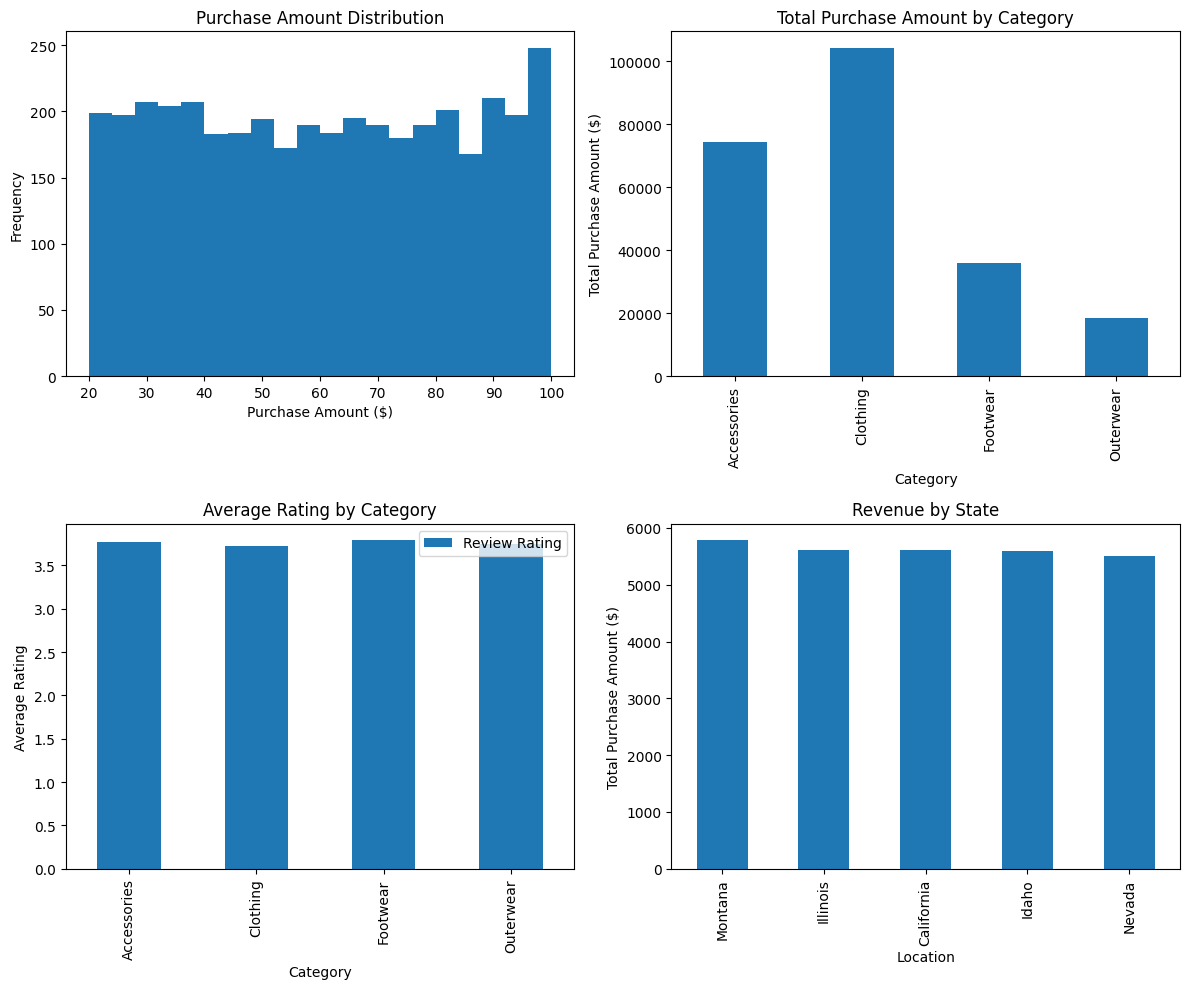

In [153]:
import matplotlib.pyplot as plt

# Set up 2x2 subplots grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Purchase Amount Distribution
ax1.hist(df['Purchase Amount (USD)'], bins=20)
ax1.set_title("Purchase Amount Distribution")  
ax1.set_xlabel("Purchase Amount ($)")
ax1.set_ylabel("Frequency")

# Purchase Amount by Category  
df.groupby(['Category'])['Purchase Amount (USD)'].sum().plot(kind='bar', ax=ax2)
ax2.set_title("Total Purchase Amount by Category")
ax2.set_xlabel("Category")
ax2.set_ylabel("Total Purchase Amount ($)")

# Average Rating by Category
rating.plot(x='Category', y='Review Rating', kind='bar', ax=ax3)  
ax3.set_title("Average Rating by Category")
ax3.set_ylabel("Average Rating")

# Revenue by State 
states.plot(kind='bar', ax=ax4)
ax4.set_title("Revenue by State") 
ax4.set_ylabel("Total Purchase Amount ($)")

fig.tight_layout()
plt.show()

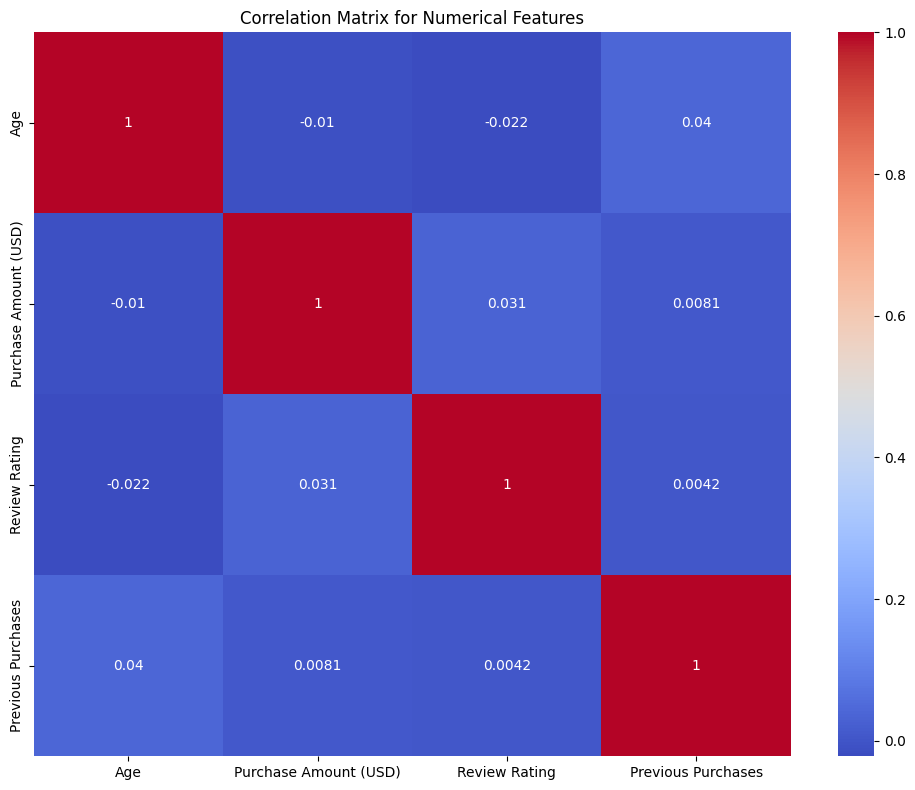

In [154]:
import seaborn as sns


# Select only numerical columns 
numerical_data = df.select_dtypes(exclude=['object']).drop(columns=['Customer ID'])

# List of numerical columns
num_cols = list(numerical_data.columns)

# Create correlation matrix heatmap
fig, ax = plt.subplots(figsize=(10,8))
corr_mat = numerical_data[num_cols].corr()
sns.heatmap(corr_mat, 
            xticklabels=num_cols,
            yticklabels=num_cols,
            cmap='coolwarm',
            annot=True,
            ax=ax)

ax.set_title("Correlation Matrix for Numerical Features")
fig.tight_layout()  
plt.show()

In [155]:

# Now, include these new columns in numerical_data and exclude 'order_date'
numerical_data = df.select_dtypes(exclude=['object']).drop(columns=['Customer ID'])

# Continue with the previous preprocessing steps
# Impute missing values for numerical columns

# Assuming categorical_data has been defined excluding 'order_date'
# For categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_data = df[categorical_cols]

print(numerical_data)
print(categorical_data)

      Age  Purchase Amount (USD)  Review Rating  Previous Purchases
0      55                     53            3.1                  14
1      19                     64            3.1                   2
2      50                     73            3.1                  23
3      21                     90            3.5                  49
4      45                     49            2.7                  31
...   ...                    ...            ...                 ...
3895   40                     28            4.2                  32
3896   52                     49            4.5                  41
3897   46                     33            2.9                  24
3898   44                     77            3.8                  24
3899   52                     81            3.1                  33

[3900 rows x 4 columns]
      Gender Item Purchased     Category       Location Size      Color  \
0       Male         Blouse     Clothing       Kentucky    L       Gray   
1       M

In [156]:


# Scale numerical features
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)
numerical_data_scaled

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,0.718913,-0.285629,-0.907584,-0.785831
1,-1.648629,0.178852,-0.907584,-1.616552
2,0.390088,0.558882,-0.907584,-0.162789
3,-1.517099,1.276716,-0.349027,1.637107
4,0.061263,-0.454531,-1.466141,0.391025
...,...,...,...,...
3895,-0.267563,-1.341267,0.628448,0.460252
3896,0.521618,-0.454531,1.047366,1.083293
3897,0.127028,-1.130139,-1.186862,-0.093563
3898,-0.004502,0.727784,0.069891,-0.093563


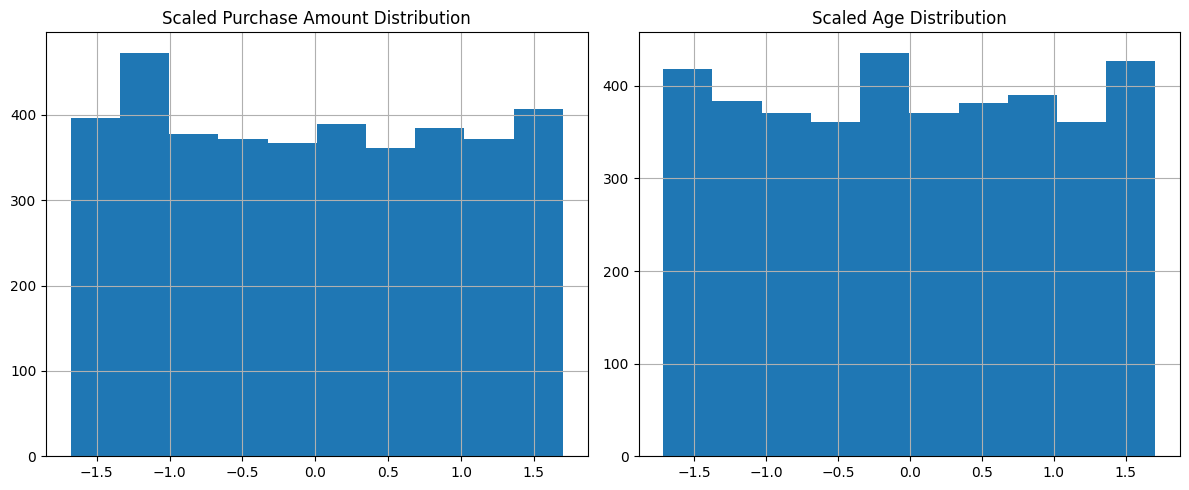

In [157]:
#scaled data plots


# Histogram 
fig, ax = plt.subplots(1,2, figsize=(12,5)) 
numerical_data_scaled['Purchase Amount (USD)'].hist(ax=ax[0])  
ax[0].set_title("Scaled Purchase Amount Distribution")

numerical_data_scaled['Age'].hist(ax=ax[1])  
ax[1].set_title("Scaled Age Distribution")

fig.tight_layout()
plt.show()



In [158]:

categorical_data_encoded = pd.get_dummies(categorical_data, drop_first=True)
categorical_data_encoded

,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,Item Purchased_Gloves,Item Purchased_Handbag,Item Purchased_Hat,Item Purchased_Hoodie,...,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,True,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,True,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
3896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3897,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [159]:


# Concatenate processed numerical and categorical data
processed_data = np.concatenate([numerical_data_scaled, categorical_data_encoded], axis=1)

# Display the shape of the processed data to confirm transformation
processed_data_shape = processed_data.shape
# First, let's reconstruct the column names for the processed data
# For numerical features, we use the original names
numerical_features = numerical_data.columns.tolist()

# For categorical features, we need to get the new column names from the encoder
categorical_features = categorical_data_encoded.columns.tolist()

# Combine all feature names
all_features = numerical_features + list(categorical_features)

# Convert the processed data into a DataFrame
processed_data_df = pd.DataFrame(processed_data, columns=all_features)

# Display the first few rows of the DataFrame to confirm
processed_data_df


,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,...,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.718913,-0.285629,-0.907584,-0.785831,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.648629,0.178852,-0.907584,-1.616552,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.390088,0.558882,-0.907584,-0.162789,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.517099,1.276716,-0.349027,1.637107,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.061263,-0.454531,-1.466141,0.391025,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,-0.267563,-1.341267,0.628448,0.460252,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3896,0.521618,-0.454531,1.047366,1.083293,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3897,0.127028,-1.130139,-1.186862,-0.093563,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3898,-0.004502,0.727784,0.069891,-0.093563,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
